In [133]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns

# Data Analysis

## Load Data

In [313]:
def get_data(df_index = [] , offset = 1 , significance = 0 ):
    df = pd.read_csv('../not_on_git/mw_cat/chandra_filtered_sources.csv' , index_col = 'name')
    df_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')[['offset' , 'class']]
    off = offset + 0.01
    df = pd.merge(df_id[df_id['offset']<off] , df , left_index=True , right_index =True , how='right')
    sig = significance
    df = df[df['significance']>sig]
    df = df.drop(columns = ['significance'  , 'offset' , 'ra' , 'dec', 'var_inter_hard_flag' , 'likelihood'])
    df = df.rename(columns = {
        'flux_aper_b' : 'b-csc' , 
        'flux_aper_h' : 'h-csc' ,
        'flux_aper_m': 'm-csc' ,
        'flux_aper_s': 's-csc' ,
        'flux_aper_u': 'u-csc' ,
    })
    df['class'] = df['class'].replace(np.nan , 'X')
    df = pd.merge(
        df , pd.read_csv('mw_cat/sdss.csv' , index_col='name') ,
        left_index=True , 
        right_index = True , 
        how = 'left'
    )
    df = pd.merge(
        df , pd.read_csv('mw_cat/2mass_v2.csv' , index_col='name') ,
        left_index=True , 
        right_index = True , 
        how = 'left'
    )
    df = pd.merge(
        df , pd.read_csv('mw_cat/wise_combined.csv' , index_col='name') ,
        left_index=True , 
        right_index = True , 
        how = 'left'
    )
    df = pd.merge(
        df , pd.read_csv('mw_cat/galex_combined.csv' , index_col='name') ,
        left_index=True , 
        right_index = True , 
        how = 'left'
    )
    df = pd.merge(
        df , pd.read_csv('mw_cat/gaia.csv' , index_col='name') ,
        left_index=True , 
        right_index = True , 
        how = 'left'
    )
    df['bp-R'] = df['bp_mag']-df['rp_mag']
    df['g-J'] = df[ 'g_mag'] - df['Jmag']
    df['g-W2'] = df['g_mag'] - df['W2mag']
    df['bp-H'] = df['bp_mag'] - df[ 'Hmag']
    df['bp-W3'] = df['bp_mag'] - df['W3mag']
    df['rp-K'] = df['rp_mag'] - df['Kmag']
    df['J-H'] = df['Jmag'] - df['Hmag']
    df['J-W1'] = df['Jmag'] - df['W1mag']
    df['W1-W2'] = df['W1mag'] - df['W2mag']
    df = df.drop(columns='class')
    if(len(df_index)>0):
        df_ret = df[df['name'].isin(df_index.index.to_list())].drop(columns='class')
        # try:
        #     df_ret.loc[: , 'class'] = df_index['class'].to_list()
        # except:
        #     print('Unidentified sources provided')
        return df_ret.set_index('name')
    else:
        return df

In [314]:
gc = pd.read_csv('gc_source_predictions.csv' , index_col='name')
gc

,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO,gc,ra,dec,significance
name,,,,,,,,,,,,,,,
2CXO J002108.4-720305,PULSAR,0.739696,0.514628,0.005297,0.225068,0.018030,6.052695e-05,0.739696,0.010912,7.932550e-04,1.434402e-04,NGC-104,5.285257,-72.051484,4.857143
2CXO J002122.5-720557,AGN,0.928479,0.907019,0.928479,0.021460,0.019168,4.326115e-05,0.008979,0.020471,1.152447e-03,2.474444e-04,NGC-104,5.344140,-72.099279,3.142857
2CXO J002142.4-715957,CV,0.604475,0.458146,0.034432,0.604475,0.053716,3.856299e-04,0.146329,0.063398,9.713705e-02,1.273056e-04,NGC-104,5.426980,-71.999246,5.696970
2CXO J002202.6-720028,CV,0.861855,0.786597,0.007795,0.861855,0.032754,2.002283e-04,0.075259,0.019922,1.847734e-03,3.677786e-04,NGC-104,5.511053,-72.007942,3.073171
2CXO J002202.9-720409,CV,0.934636,0.872954,0.001452,0.934636,0.061682,5.572292e-05,0.001637,0.000194,3.272388e-04,1.662362e-05,NGC-104,5.512213,-72.069178,11.988657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J213526.6-010313,PULSAR,0.965468,0.934386,0.031082,0.000477,0.001398,1.020319e-04,0.965468,0.000862,5.705433e-04,4.031213e-05,NGC-7089,323.860933,-1.053743,3.588235
2CXO J213530.2-010221,AGN,0.997933,0.995987,0.997933,0.000098,0.000014,8.410442e-07,0.001946,0.000007,3.352657e-07,5.749181e-07,NGC-7089,323.876232,-1.039309,2.105263
2CXO J213532.1-005938,STAR,0.638110,0.317896,0.038134,0.001145,0.001521,2.591501e-04,0.320215,0.638110,5.432063e-04,7.169304e-05,NGC-7089,323.884018,-0.994065,2.105263


In [319]:
df = get_data().reset_index()
df 

,name,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,...,rp_mag,bp-R,g-J,g-W2,bp-H,bp-W3,rp-K,J-H,J-W1,W1-W2
0,2CXO J003935.9-732725,304.096050,-43.644346,0,0.000000e+00,7.141104e-15,1.529669e-15,0.000000e+00,0.000000e+00,0.231106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J003936.7-731249,304.116127,-43.887309,0,1.458552e-14,1.196830e-14,2.057132e-15,0.000000e+00,NaN,0.343535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2CXO J004028.7-731106,304.031850,-43.919668,0,1.094959e-13,8.183634e-14,1.744202e-14,1.216939e-14,NaN,0.269831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J004506.3-730056,303.575841,-44.104667,0,2.379848e-14,1.178519e-14,7.671868e-15,4.860946e-15,6.986833e-14,-0.106184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J004659.0-731918,303.374710,-43.802532,0,0.000000e+00,0.000000e+00,1.259314e-15,6.172243e-16,8.098542e-14,0.151156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277591,2CXO J220613.7-495727,345.582863,-51.190099,0,3.452933e-14,2.859357e-14,7.190546e-15,0.000000e+00,NaN,-0.013741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277592,2CXO J220614.6-500951,345.272648,-51.119708,0,7.855447e-15,2.507461e-15,0.000000e+00,5.262109e-15,0.000000e+00,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277593,2CXO J220618.4-500554,345.365084,-51.152644,0,2.417635e-14,1.919246e-14,2.265201e-15,3.881337e-15,0.000000e+00,0.463460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277594,2CXO J220626.0-500126,345.465212,-51.197834,0,1.396537e-14,6.728313e-15,1.926068e-15,3.797846e-15,0.000000e+00,0.153654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
gc_true = df[df['name'].isin(gc.index.to_list())].set_index('name')
#gc_true = df.loc[gc.index.to_list()]
gc_true 

,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,hard_hs,...,rp_mag,bp-R,g-J,g-W2,bp-H,bp-W3,rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J173143.2-312724,356.265234,1.193059,0,4.989548e-15,0.000000e+00,2.187632e-15,0.000000e+00,0.000000e+00,0.287320,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J173149.6-313317,356.195606,1.120077,0,1.655604e-14,1.583053e-14,0.000000e+00,1.665819e-15,NaN,0.999375,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J173153.3-312759,356.276783,1.157748,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.999375,-0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J173154.4-312921,356.259870,1.141891,0,1.632874e-14,2.063104e-14,0.000000e+00,0.000000e+00,NaN,0.999375,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J173156.2-313514,356.181136,1.082945,0,8.156261e-14,8.319464e-14,1.026979e-15,0.000000e+00,NaN,0.918176,0.865709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J132729.3-472553,309.230508,14.998871,0,1.006927e-14,7.570995e-15,1.131341e-15,1.284240e-15,0.000000e+00,0.368520,0.106184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J132729.3-473635,309.203940,14.822244,0,2.728927e-15,6.500710e-15,1.099823e-15,0.000000e+00,NaN,0.407245,0.382261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J132734.1-473149,309.229619,14.899170,0,3.607599e-15,2.517606e-15,8.082462e-16,5.319952e-16,NaN,0.098688,-0.208620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
pd.merge(gc , gc_true , left_index=True , right_index=True)

,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,...,rp_mag,bp-R,g-J,g-W2,bp-H,bp-W3,rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002108.4-720305,PULSAR,0.739696,0.514628,0.005297,0.225068,0.018030,6.052695e-05,0.739696,0.010912,7.932550e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002122.5-720557,AGN,0.928479,0.907019,0.928479,0.021460,0.019168,4.326115e-05,0.008979,0.020471,1.152447e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002142.4-715957,CV,0.604475,0.458146,0.034432,0.604475,0.053716,3.856299e-04,0.146329,0.063398,9.713705e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002202.6-720028,CV,0.861855,0.786597,0.007795,0.861855,0.032754,2.002283e-04,0.075259,0.019922,1.847734e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002202.9-720409,CV,0.934636,0.872954,0.001452,0.934636,0.061682,5.572292e-05,0.001637,0.000194,3.272388e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J213526.6-010313,PULSAR,0.965468,0.934386,0.031082,0.000477,0.001398,1.020319e-04,0.965468,0.000862,5.705433e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J213530.2-010221,AGN,0.997933,0.995987,0.997933,0.000098,0.000014,8.410442e-07,0.001946,0.000007,3.352657e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J213532.1-005938,STAR,0.638110,0.317896,0.038134,0.001145,0.001521,2.591501e-04,0.320215,0.638110,5.432063e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
deets(gc_true,1)

_____________________________________________________
------------------------------
Number of Objects : 1922
Number of Columns : 45
------------------------------


X         1851
CV          33
PULSAR      20
STAR        14
LMXB         2
AGN          1
HMXB         1
Name: class, dtype: int64

_____________________________________________________


In [301]:
deets(df,1)

_____________________________________________________
------------------------------
Number of Objects : 277596
Number of Columns : 46
------------------------------


X         269893
STAR        2790
AGN         2395
YSO         1149
HMXB         748
ULX          211
CV           166
LMXB         143
PULSAR       101
Name: class, dtype: int64

_____________________________________________________


In [297]:
from utilities import deets
df = get_data(pd.read_csv('gc_source_predictions.csv' , index_col='name'))
deets(df , 1)

Unidentified sources provided
_____________________________________________________
------------------------------
Number of Objects : 1922
Number of Columns : 45
------------------------------


X         1851
CV          33
PULSAR      20
STAR        14
LMXB         2
AGN          1
HMXB         1
Name: class, dtype: int64

_____________________________________________________


In [191]:
cd = [[ 'g_mag' , 'g-J'],
['g_mag' , 'bp-H'] , 
['g_mag' , 'bp-W3' ]  , 
['J' , 'g-W2'] , 
['J' , 'bp-H'] , 
['J' ,'bp-W3' ] , 
['W1' , 'rp-K'] , 
['W1' , 'bp-W3'] , 
['W2' , 'g-W2'] , 
['g-J' , 'Bp-W3'] , 
['g-J' , 'Bp-W3'] , 
['W1-W2' , 'bp-W3']]
cd = [tuple(el) for el in cd]
hard = ['hard_hm' , 'hard_ms']

In [ ]:
['g_mag' , 'bp-W3' ]
['Jmag' ,'bp-W3' ]
['W2mag' , 'g-W2']
 [['g-J' , 'bp-W3'] , ['g-J' , 'bp-W3'] , ['W1-W2' , 'bp-W3']]
]

In [204]:
cd = [
    [[ 'g_mag' , 'g-J'],['g_mag' , 'bp-H']  ]  , 
    [['Jmag' , 'g-W2'] , ['Jmag' , 'bp-H']  ] , 
    [['W1mag' , 'rp-K'] , ['W1mag' , 'bp-W3']] 
    
    ] 
   

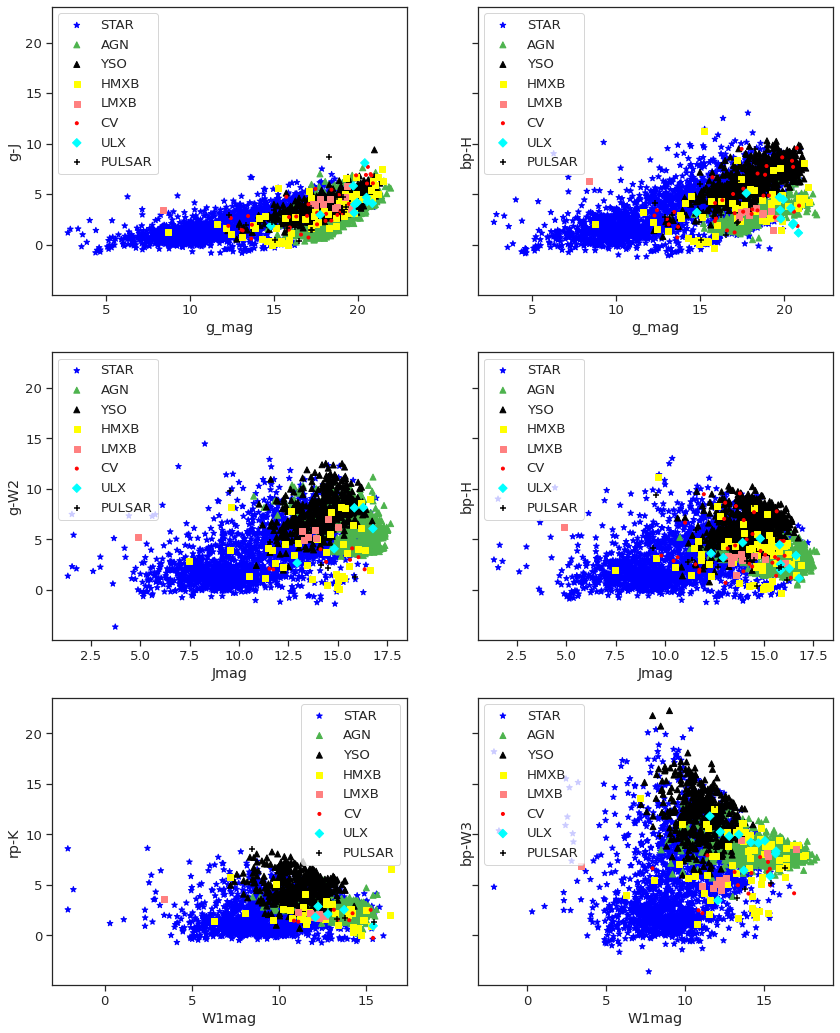

In [227]:
cl = [ 'STAR' , 'AGN', 'YSO' , 'HMXB' ,'LMXB' , 'CV' ,'ULX' , 'PULSAR' ]
fig , ax =  plt.subplots(nrows=3 , ncols=2 , figsize=(14,18) , sharey=True)
#cl = np.reshape(cl , ax.shape)
#cdr = np.reshape(cd , ax.shape)
for i in range(3):
    for j in range(2):
        for c in cl:
            temp = df[df['class']==c]
            rgba_colors = np.zeros((len(temp),3))
            if(c=='CV'):
                rgba_colors[:,0] = 1
                marker='.'
            elif(c=='AGN'):
                rgba_colors[:,0] = 0.3
                rgba_colors[:,1] = 0.7
                rgba_colors[:,2] = 0.3
                marker='^'
            elif(c=='HMXB'):
                rgba_colors[:,0] = 1
                rgba_colors[:,1] = 1
                marker='s'
            elif(c=='STAR'):
                #rgba_colors[:,0] = 1
                rgba_colors[:,2] = 1
                marker = '*'
            elif(c=='PULSAR'):
                rgba_colors[:,0] = 0
                rgba_colors[:,1] = 0
                rgba_colors[:,2] = 0
                marker = '+'
            elif(c=='ULX'):
                rgba_colors[:,0] = 0
                rgba_colors[:,1] = 1
                rgba_colors[:,2] = 1
                marker = 'D'
            elif(c=='LMXB'):
                rgba_colors[:,0] = 1
                rgba_colors[:,1] = 0.5
                rgba_colors[:,2] = 0.5
                marker = 's'
    #rgba_colors[:, 3] = temp['prob']
            ax[i][j].scatter(temp[cd[i][j][0]],temp[cd[i][j][1]]  , label=c , marker=marker , color = rgba_colors)
            #ax[i][j].scatter(temp[cd[i][j][1]],temp[cd[i][j][0]] , alpha=alpha, marker=marker , label = c)
            ax[i][j].set_xlabel(cd[i][j][0]) , 
            ax[i][j].set_ylabel(cd[i][j][1])
            ax[i][j].legend()
plt.show()

In [265]:
def plot(data , xq,yq , xlabel = '' , ylabel = ''):
    cl = [ 'STAR' , 'AGN', 'YSO' , 'HMXB' ,'LMXB' , 'CV' ,'ULX' , 'PULSAR' ]
    fig , ax =  plt.subplots(nrows=1 , ncols=1 , figsize=(11,6) , sharey=True)
    sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")

    for c in cl:
        temp = data[data['class']==c]
        rgba_colors = np.zeros((len(temp),3))
        if(c=='CV'):
            rgba_colors[:,0] = 1
            marker='o'
        elif(c=='AGN'):
            rgba_colors[:,0] = 0.3
            rgba_colors[:,1] = 0.7
            rgba_colors[:,2] = 0.3
            marker='^'
        elif(c=='HMXB'):
            rgba_colors[:,0] = 1
            rgba_colors[:,1] = 1
            marker='s'
        elif(c=='STAR'):
            #rgba_colors[:,0] = 1
            rgba_colors[:,2] = 1
            marker = '*'
        elif(c=='PULSAR'):
            rgba_colors[:,0] = 0
            rgba_colors[:,1] = 0
            rgba_colors[:,2] = 0
            marker = '+'
        elif(c=='ULX'):
            rgba_colors[:,0] = 0
            rgba_colors[:,1] = 1
            rgba_colors[:,2] = 1
            marker = 'D'
        elif(c=='LMXB'):
            rgba_colors[:,0] = 1
            rgba_colors[:,1] = 0.5
            rgba_colors[:,2] = 0.5
            marker = 's'
    #rgba_colors[:, 3] = temp['prob']
        ax.scatter(temp[xq],temp[yq]  , label=c , marker=marker , color = rgba_colors)
        ax.set_xlabel(xlabel) 
        ax.set_ylabel(ylabel)
        ax.legend()
    return fig , ax 
#plt.show()

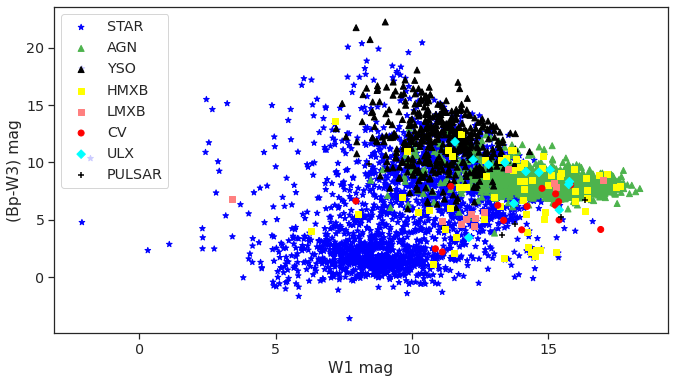

In [269]:
xq  , yq =  'W1mag' , 'bp-W3' ,
fig , ax = plot(xq,yq , xlabel='W1 mag' , ylabel='(Bp-W3) mag')
plt.show()

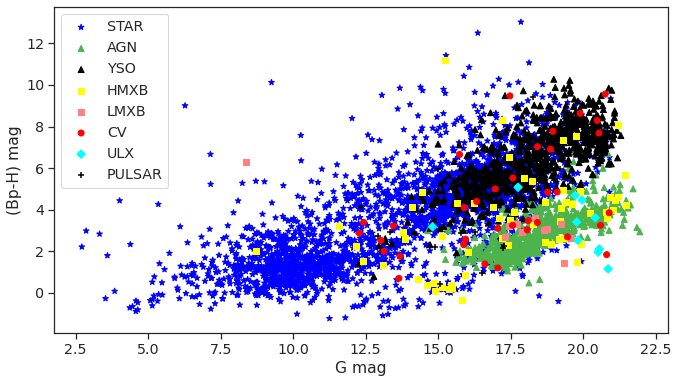

In [270]:
xq  , yq = 'g_mag' , 'bp-H'
fig , ax = plot(xq,yq , xlabel = 'G mag' , ylabel = '(Bp-H) mag')
plt.show()

In [136]:
l#og-fb - bp-w3
G vs W 
G : H 
gaia vs hardness
#fx/fo important
G : g-j
G : G-W2 
G : Bp-H
G : Rp-k
G : Bp-W3
J : W3 
#J : Fx / Fo 
J : G-J 
J : G-W2 
J : Bp-H 
J : Bp-W3 
W1: rp-k
W1 : bp-w3 
W1 : G-W2 
#W1 : fx/fo 
W1 : G 
hr-hm : hr-ms 
G-J : Bp-W3 
Bp-H : G-J 
bp-w3 : w1-w2


,class,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,...,rp_mag,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,X,304.096050,-43.644346,0,0.000000e+00,7.141104e-15,1.529669e-15,0.000000e+00,0.000000e+00,0.231106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J003936.7-731249,X,304.116127,-43.887309,0,1.458552e-14,1.196830e-14,2.057132e-15,0.000000e+00,NaN,0.343535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004028.7-731106,X,304.031850,-43.919668,0,1.094959e-13,8.183634e-14,1.744202e-14,1.216939e-14,NaN,0.269831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004506.3-730056,X,303.575841,-44.104667,0,2.379848e-14,1.178519e-14,7.671868e-15,4.860946e-15,6.986833e-14,-0.106184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004659.0-731918,X,303.374710,-43.802532,0,0.000000e+00,0.000000e+00,1.259314e-15,6.172243e-16,8.098542e-14,0.151156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,X,345.582863,-51.190099,0,3.452933e-14,2.859357e-14,7.190546e-15,0.000000e+00,NaN,-0.013741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220614.6-500951,X,345.272648,-51.119708,0,7.855447e-15,2.507461e-15,0.000000e+00,5.262109e-15,0.000000e+00,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220618.4-500554,X,345.365084,-51.152644,0,2.417635e-14,1.919246e-14,2.265201e-15,3.881337e-15,0.000000e+00,0.463460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
x = df[df['class']!='X']
y = x['class']
#x = x.drop(columns=['class'])
u = df[df['class']=='X']
u = u[u['var_flag']==1]
u = u.drop(columns = ['class'])

In [175]:
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 45
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 37844
Number of Columns : 44
_____________________________________________________


## Missing values

In [77]:
miss = []
for cl in y.unique():
#    cl = 'AGN'
    temp = x[x['class']==cl].drop(columns=['class'])
    miss.append((1-temp.isna().sum(axis=0) / len(temp)).to_frame(name=cl))
miss = pd.concat(miss , axis=1)
xd = x.drop(columns=['class'])
miss.insert(0 , 'overall' , (1-xd.isna().sum(axis=0) / len(xd)).to_list())
miss = miss[['overall' , 'AGN' , 'STAR' ,'YSO' , 'CV' , 'PULSAR' , 'HMXB'  , 'LMXB' ,'ULX']]

param_dict = {
    'SDSS' : ['umag' , 'gmag' , 'imag' , 'zmag' , 'rmag'] , 
    'WISE' : ['W1mag' , 'W2mag' , 'W3mag' , 'W4mag'] , 
    'GAIA' :['g_mag' , 'bp_mag' , 'rp_mag'] , 
    '2MASS' :['Jmag' , 'Hmag' , 'Kmag'] , 
    'GALEX' :['fuv_mag' , 'nuv_mag']
}
param_dict['inter-obs-var'] = ['var_inter_prob_b' , 'var_inter_sigma_b' , 'var_inter_index_b']
param_dict['intra-obs-var'] = ['var_intra_prob_b' , 'kp_intra_prob_b' , 'var_intra_index_b']
comb = ['WISE' , '2MASS' , 'GAIA' , 'SDSS' , 'GALEX' ,'inter-obs-var','intra-obs-var' ]
comb_df = []
for c in comb:
    comb_df.append(miss.loc[param_dict[c]].mean().to_frame(name=c).T)
comb_df = pd.concat(comb_df)
comb_df

sep_col = ['h-csc' ,'b-csc' , 'm-csc' , 'u-csc' ,'B-R' , 'G-J' , 'G-W2' , 'Bp-H' , 'Bp-W3' , 'Rp-K' , 'J-H' , 'J-W1' , 'W1-W2' ]
sep_df = miss.loc[sep_col]
sep_df
miss_comb_df = pd.concat([sep_df , comb_df]).sort_values(by='overall' , ascending=False)
miss_comb_df

,overall,AGN,STAR,YSO,CV,PULSAR,HMXB,LMXB,ULX
b-csc,0.967818,0.981627,0.952331,0.983333,0.781065,0.990476,0.986825,0.965035,0.985981
intra-obs-var,0.949322,0.985752,0.921837,0.945833,0.798817,0.952381,0.965744,0.874126,0.990654
m-csc,0.940074,0.968504,0.921486,0.949167,0.763314,0.942857,0.948617,0.804196,0.981308
h-csc,0.933909,0.972628,0.875920,0.979167,0.769231,0.904762,0.971014,0.958042,0.967290
GAIA,0.728113,0.728909,0.967403,0.715000,0.544379,0.371429,0.197628,0.223776,0.140187
B-R,0.728113,0.728909,0.967403,0.715000,0.544379,0.371429,0.197628,0.223776,0.140187
u-csc,0.688779,0.734158,0.662461,0.561667,0.597633,0.628571,0.799736,0.853147,0.785047
W1-W2,0.681628,0.869516,0.801963,0.550000,0.147929,0.085714,0.229249,0.139860,0.154206
WISE,0.678052,0.869516,0.793901,0.545000,0.147929,0.085714,0.229249,0.139860,0.154206
2MASS,0.582244,0.262842,0.959692,0.910000,0.301775,0.209524,0.115942,0.090909,0.079439


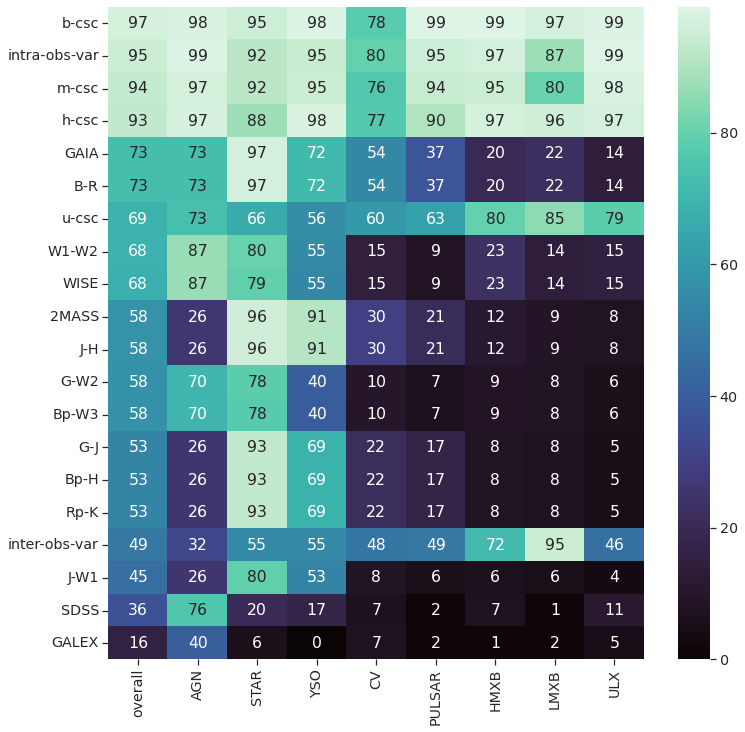

In [78]:
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="ticks")
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
sns.heatmap(miss_comb_df*100 , ax=ax , annot=True , fmt='.0f' , cmap='mako')
plt.xticks(rotation=90)
#plt.savefig('final_plots/missing_features.eps' , format='eps')
#plt.savefig('final_plots/missing_features.jpg' , format='jpg')
plt.show()

# Train Classifier

In [176]:
from utilities import simple_cv
param = {
    'objective': 'binaryclass',
    'num_class':len(np.unique(y)),
    'metric': ['auc_mu' , ] , 
    'verbosity' : 2 , 
    'deterministic' : True  , 
    'early_stopping_round' : 20 , 
    'sparse' : True , 
    'is_unbalance' : True
    }
def calc_weight(gamma , y):
    l = len(y)
    cl_weight = {}
    cl_dict = y.value_counts().to_dict()
    for cl , val in zip(cl_dict.keys() , cl_dict.values()):
        w = np.exp((l / val)*gamma)
        cl_weight[cl] = w
    #print(cl_weight)
    return cl_weight

In [177]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name 
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'].to_markdown())
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

### Normalize 

In [178]:
from sklearn.preprocessing import MinMaxScaler
norm  = MinMaxScaler(feature_range=(0,10))
xn = norm.fit_transform(x.drop(columns=['class']))
xn = pd.DataFrame(xn , columns=x.drop(columns=['class']).columns.to_list() , index = x.index.to_list())
un = norm.transform(u)
un = pd.DataFrame(un , columns = u.columns.to_list() , index = u.index.to_list())

In [179]:
xn

,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,hard_hs,...,rp_mag,bp-R,g-J,g-W2,bp-H,bp-W3,rp-K,J-H,J-W1,W1-W2
2CXO J005634.9-732630,8.400731,2.546960,0.0,0.009376,0.014046,0.010123,0.000000,0.000000e+00,6.56875,10.00000,...,8.030327,3.501902,2.436288,3.088457,3.173957,3.631708,2.813521,4.109840,4.094203,4.567045
2CXO J010309.0-724455,8.381088,2.509465,0.0,0.009497,0.004543,0.007445,0.006731,2.310221e-05,2.90625,0.50625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.365370,4.498702,4.460307
2CXO J010413.1-731905,8.379535,2.541529,0.0,0.023216,0.004060,0.009970,0.022041,0.000000e+00,3.58125,0.35000,...,3.951549,2.961170,1.837307,2.853618,2.095379,2.129103,1.922021,2.947368,4.226693,4.489660
2CXO J164659.8-455525,9.430220,4.965304,0.0,0.014020,0.024346,0.002532,0.000353,0.000000e+00,8.96875,10.00000,...,5.995487,8.995957,6.282667,8.350315,8.871900,7.187541,7.525688,5.180778,6.556349,5.969313
2CXO J164818.2-461039,9.428908,4.946457,0.0,0.016615,0.000000,0.021100,0.014550,NaN,0.00000,0.00000,...,3.547036,2.533029,1.666508,2.811300,1.790080,2.349007,1.939337,2.803966,4.264547,4.527018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J073751.2-303940,6.812125,4.738073,0.0,0.024611,0.005640,0.029337,0.017930,8.598711e-06,2.17500,0.61875,...,8.276687,2.764355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J073756.3-303557,6.810865,4.740655,10.0,0.005672,0.002567,0.007325,0.003914,1.436520e-06,2.77500,0.85625,...,3.884456,2.136725,1.072583,2.251638,1.128902,1.561221,1.233326,2.459191,4.073653,4.454970
2CXO J073810.2-303824,6.812530,4.741969,0.0,0.005850,0.000000,0.001806,0.006156,4.128000e-06,0.61250,0.00000,...,3.528270,2.687928,1.596306,2.621639,1.763759,1.901717,1.666024,2.759725,4.141791,4.466978
2CXO J113218.2-301952,7.869974,6.640436,10.0,0.014563,0.010783,0.027946,0.004017,2.316437e-07,3.79375,3.49375,...,6.095504,5.920630,6.303944,5.775119,6.474540,5.248764,5.597140,3.292143,4.401904,5.027352


In [181]:
#xn = x.drop(columns=['class'])
y = x['class']

In [182]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
import lightgbm as lgb 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
gamma = 0.016
cl_weight = calc_weight(gamma , y)
clf = lgb.LGBMClassifier(n_estimators = 80 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , random_state=42 , num_class=len(np.unique(y)) ,force_col_wise=True)
model = make_model('lightGBM' , clf ,gamma , xn,y)
model.validate(k=20)
model.train()

>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.987056 |          0.957861 |   0.972239 |
| CV      |       0.536145 |          0.622378 |   0.576052 |
| HMXB    |       0.9

In [234]:
model.result

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2799
 AGN           2468
 YSO           1205
 HMXB           736
 ULX            171
 CV             143
 LMXB           117
 PULSAR          64,
 'avg_scores': {'balanced_accuracy': 0.7676500965538724,
  'accuracy': 0.9361287809944178,
  'precision': 0.8374867420222742,
  'recall': 0.7676500965538724,
  'f1': 0.7970373812017799},
 'mcc': 0.9132211560210991,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.987056         0.957861  0.972239
 CV          0.536145         0.622378  0.576052
 HMXB        0.905080         0.919837  0.912399
 LMXB        0.804196         0.982906  0.884615
 PULSAR      0.366337         0.578125  0.448485
 STAR        0.966308         0.963201  0.964752
 ULX         0.616114         0.760234  0.680628
 YSO         0.959965         0.9

In [235]:
model.train()

In [236]:
model.result['res_table'].to_csv('temp_res_comp/train_prob/new-data_lightGBM.csv')
#model.train()
model.save('models/lightGBM-new-final.pkl')

# Application

In [237]:
import joblib 
model = joblib.load('models/lightGBM-new-final.pkl')
clf = model.clf

In [238]:
deets(xn)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 44
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 37844
Number of Columns : 44
_____________________________________________________


In [239]:
from utilities import softmax , norm_prob
pred_prob = (clf.predict_proba(u))
pred_prob_df = pd.DataFrame(pred_prob , columns=[f'prob_{el}' for el in clf.classes_] , index = u.index.to_list())
pred_prob_df

,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
2CXO J004829.5-732959,0.019484,0.001142,0.678920,0.000315,0.200401,0.077220,0.021440,0.001078
2CXO J005449.0-725128,0.024182,0.001505,0.575099,0.000483,0.266772,0.109191,0.021244,0.001524
2CXO J010049.1-731526,0.031127,0.001884,0.679576,0.000745,0.128817,0.119226,0.036962,0.001664
2CXO J010049.8-731045,0.027712,0.001783,0.607403,0.000553,0.257126,0.086902,0.017041,0.001481
2CXO J010647.7-730940,0.015463,0.001261,0.666932,0.000223,0.218210,0.057624,0.039248,0.001039
...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,0.004293,0.000183,0.945684,0.000211,0.035145,0.011615,0.002467,0.000402
2CXO J220508.3-495935,0.004962,0.000379,0.939668,0.000211,0.030793,0.017815,0.005627,0.000545
2CXO J220544.0-495505,0.002282,0.000251,0.954894,0.000026,0.029206,0.012502,0.000553,0.000286
2CXO J220555.6-500837,0.004315,0.000183,0.950506,0.000121,0.030317,0.011674,0.002480,0.000404


In [240]:
u_df = pd.DataFrame({
    'name' : u.index.to_list() , 
    'class' : clf.predict(u) , 
    'prob' : [np.amax(el) for el in pred_prob] ,
    'prob_margin' : [el[-1]-el[-2] for el in np.sort(pred_prob , axis=1 ,)]
}).set_index('name')
u_df = pd.merge(u_df , pred_prob_df , left_index=True , right_index=True)
u_df.index.name = 'name'
u_df 

,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J004829.5-732959,HMXB,0.678920,0.478519,0.019484,0.001142,0.678920,0.000315,0.200401,0.077220,0.021440,0.001078
2CXO J005449.0-725128,HMXB,0.575099,0.308327,0.024182,0.001505,0.575099,0.000483,0.266772,0.109191,0.021244,0.001524
2CXO J010049.1-731526,HMXB,0.679576,0.550759,0.031127,0.001884,0.679576,0.000745,0.128817,0.119226,0.036962,0.001664
2CXO J010049.8-731045,HMXB,0.607403,0.350277,0.027712,0.001783,0.607403,0.000553,0.257126,0.086902,0.017041,0.001481
2CXO J010647.7-730940,HMXB,0.666932,0.448722,0.015463,0.001261,0.666932,0.000223,0.218210,0.057624,0.039248,0.001039
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.945684,0.910539,0.004293,0.000183,0.945684,0.000211,0.035145,0.011615,0.002467,0.000402
2CXO J220508.3-495935,HMXB,0.939668,0.908876,0.004962,0.000379,0.939668,0.000211,0.030793,0.017815,0.005627,0.000545
2CXO J220544.0-495505,HMXB,0.954894,0.925688,0.002282,0.000251,0.954894,0.000026,0.029206,0.012502,0.000553,0.000286


In [241]:
u_df['class'].value_counts()

HMXB      23387
PULSAR     7434
STAR       3614
AGN        2387
ULX         829
CV          145
YSO          45
LMXB          3
Name: class, dtype: int64

In [242]:
ui = pd.read_csv('flags/chandra_all_flags.csv' , index_col='name')[['ra', 'dec']]
u_pos = pd.merge(u_df[['class','prob']] , ui[['ra','dec']] ,left_index=True,right_index=True , how='left')
u_pos

,class,prob,ra,dec
name,,,,
2CXO J004829.5-732959,HMXB,0.678920,12.123114,-73.499901
2CXO J005449.0-725128,HMXB,0.575099,13.704345,-72.857987
2CXO J010049.1-731526,HMXB,0.679576,15.204787,-73.257463
2CXO J010049.8-731045,HMXB,0.607403,15.207831,-73.179381
2CXO J010647.7-730940,HMXB,0.666932,16.699164,-73.161175
...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.945684,331.138121,-49.987838
2CXO J220508.3-495935,HMXB,0.939668,331.284642,-49.993301
2CXO J220544.0-495505,HMXB,0.954894,331.433541,-49.918280


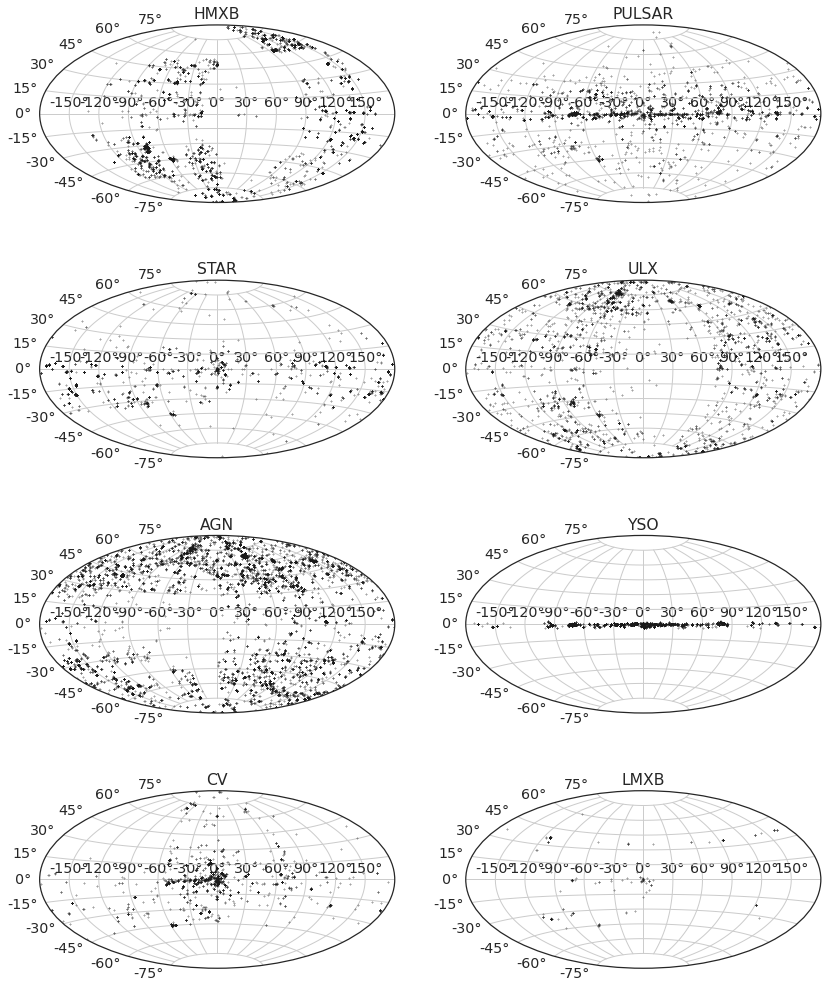

In [118]:
from astropy.coordinates import SkyCoord
from astropy import units as unit 
# plt.figure(figsize=(12,10))
# plt.subplot(111, projection='aitoff' ,)
# plt.grid(True)
classes = u_df['class'].unique()
colors =['black','lightcoral','lime','fuchsia', 'teal' , 'gold' , 'crimson' , 'indigo']
#fig , ax = plt.subplots(nrows=2, ncols=4 , figsize=(16,10) , projection='aitoff' ,)
k = 0
#cl = np.reshape(classes , ax.shape)
fig = plt.figure(figsize=(14, 18))
for i in range(1,9):
    #cl = classes[k]
    df_plot = u_pos[u_pos['class']==classes[i-1]]
    prob_th = 0.
    df_plot = df_plot[df_plot['prob']>prob_th]
    eq = SkyCoord(df_plot['ra'] , df_plot['dec'] , unit = unit.deg)
    gal = eq.galactic
    ax = fig.add_subplot(int(f'42{i}') , projection='aitoff')
    ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian , s=1 , marker='x',alpha=0.4 , label=classes[i-1] , color='k')
    ax.set_title(classes[i-1])
    #plt.legend()
#fig.suptitle('Non-Var sources distribution : Probability threshold - Argmax | Model - LightGBM-OVA | No gal coordinates')
#plt.savefig('plots/all_src_pred/lightgbm_non-var.jpg')
plt.show()

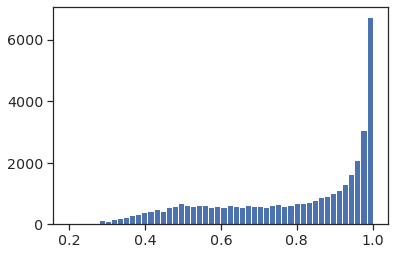

0.9839397325968233

In [119]:
x ,y ,z = plt.hist(u_df['prob'] ,bins=50)
plt.grid()
plt.show()
mode = y[np.argmax(x)]
mode

In [120]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>mode]['class'].value_counts(),
                u_df[u_df['prob']>0.5]['class'].value_counts(),
                u_df[u_df['prob']>0.6]['class'].value_counts(),
                u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                #u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' , f"Most probable > {mode :.2f}" ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9']
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
u_df_num.append(u_df_num.sum() , ignore_index=True)
print(u_df_num.to_markdown())

| class   |   Argmax |   Most probable > 0.98 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |
|:--------|---------:|-----------------------:|------:|------:|------:|------:|------:|
| AGN     |    10327 |                   2734 |  9493 |  8690 |  7888 |  6983 |  5680 |
| YSO     |     9754 |                   2376 |  9210 |  8700 |  8057 |  7278 |  5921 |
| HMXB    |     5545 |                    743 |  4490 |  3708 |  2989 |  2398 |  1760 |
| ULX     |     3562 |                    168 |  2970 |  2460 |  2037 |  1546 |   921 |
| STAR    |     3020 |                    333 |  2161 |  1703 |  1313 |   977 |   660 |
| PULSAR  |     2987 |                    193 |  2397 |  1986 |  1618 |  1232 |   747 |
| CV      |     2362 |                    122 |  1744 |  1403 |  1073 |   766 |   425 |
| LMXB    |      221 |                     60 |   172 |   138 |   111 |    96 |    77 |


In [121]:
print(u_df_num.to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Argmax &  Most probable > 0.98 &   0.5 &   0.6 &   0.7 &   0.8 &   0.9 \\
\textbf{class } &         &                       &       &       &       &       &       \\
\midrule
\textbf{AGN   } &   10327 &                  2734 &  9493 &  8690 &  7888 &  6983 &  5680 \\
\textbf{YSO   } &    9754 &                  2376 &  9210 &  8700 &  8057 &  7278 &  5921 \\
\textbf{HMXB  } &    5545 &                   743 &  4490 &  3708 &  2989 &  2398 &  1760 \\
\textbf{ULX   } &    3562 &                   168 &  2970 &  2460 &  2037 &  1546 &   921 \\
\textbf{STAR  } &    3020 &                   333 &  2161 &  1703 &  1313 &   977 &   660 \\
\textbf{PULSAR} &    2987 &                   193 &  2397 &  1986 &  1618 &  1232 &   747 \\
\textbf{CV    } &    2362 &                   122 &  1744 &  1403 &  1073 &   766 &   425 \\
\textbf{LMXB  } &     221 &                    60 &   172 &   138 &   111 &    96 &    77 \\
\bottomrule
\end{tabular}



In [122]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
#cl.remove('LMXB')
sample = [u_df[u_df['class']==c]['prob'] for c in cl]
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title="Unidentified sources | No Imputation | LightGBM classifier",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image('temp_res_comp/unid_prob_dist/lightGBM_none.jpg')
fig.show()

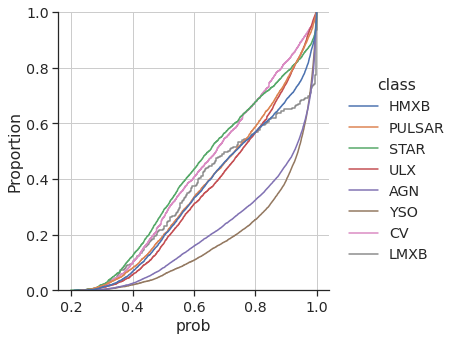

In [123]:
sns.displot(
    data = u_df ,
    kind='ecdf' ,
    x = 'prob' ,
    hue = 'class'
)
#plt.savefig('plots/higher_models/lbg_unid_prob.jpg')
plt.show()

In [124]:
u_conf = u[u_df['prob']>0.98]
u_conf

,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,hard_hs,...,rp_mag,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J011105.6-730106,300.937666,-44.033723,1,3.050130e-14,1.434232e-14,1.296133e-15,1.304980e-14,0.000000e+00,0.502186,-0.600874,...,8.960229,0.586417,0.751436,0.976436,1.169646,1.206646,0.608229,0.201,0.266,-0.041
2CXO J171938.0-355912,351.104697,0.737766,1,3.444959e-15,3.787304e-15,NaN,NaN,NaN,0.999375,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J171943.9-355454,351.175168,0.762467,1,5.771630e-16,0.000000e+00,7.960918e-16,NaN,NaN,-0.999375,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J172032.1-354234,351.436843,0.746385,1,9.567340e-15,7.391813e-15,2.596464e-15,0.000000e+00,NaN,0.173641,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J172032.1-354323,351.425694,0.738649,1,3.325596e-15,2.042910e-15,1.223466e-15,0.000000e+00,NaN,0.047470,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J113209.8-302106,283.293645,29.479137,1,2.305849e-15,1.924246e-15,4.593868e-16,NaN,NaN,0.316052,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J113223.2-302439,283.369008,29.440145,1,4.340756e-15,3.567133e-15,8.981958e-16,0.000000e+00,NaN,0.153654,0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J223943.8-053429,61.491565,-51.979333,1,4.532208e-14,2.568541e-14,6.823947e-15,1.036159e-14,NaN,0.106184,-0.287320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
y_p = u_df['class']
cl = ['AGN' ,'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' ,'PULSAR']
sns.set(font_scale=1.2, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")
f = 'kp_intra_prob_b'
f = 'var_inter_prob_b'

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



KeyError: False

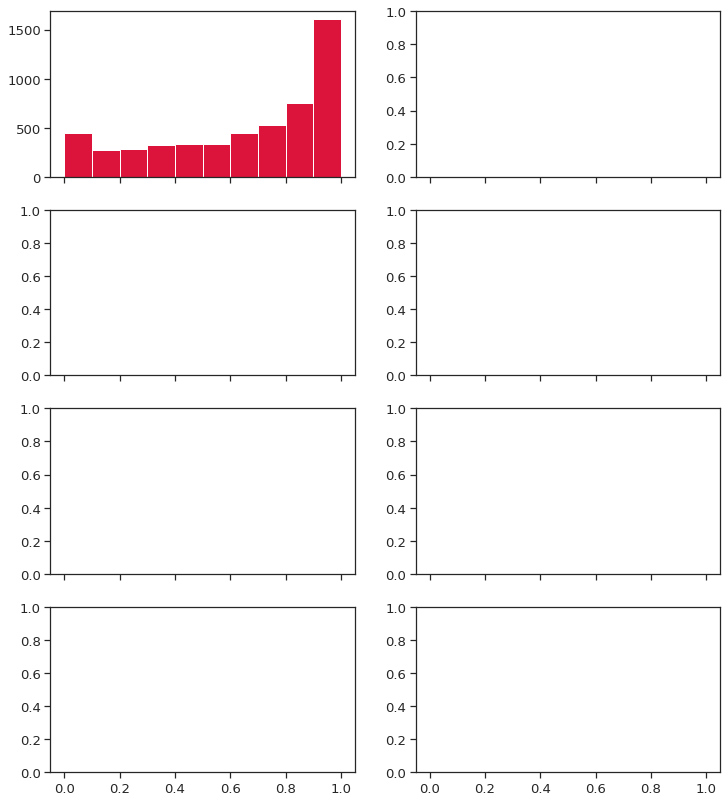

In [132]:
fig , ax = plt.subplots(nrows=4, ncols=2 , figsize=(12,14) , sharex=True)
#plt.hist(x['kp_intra_prob_b'])
cl = np.reshape(cl , ax.shape)
for i in range(4):
    for j in range(2):
        temp = u[y_p==cl[i][j]]
        ax[i][j].hist(temp[f] , label = 'Unidentified sources' , color='crimson' , )
        temp = xn[y==cl[i][j]]
        #display(temp)
        ax[i][j].hist(temp[f] , label = 'Training sources' , color='black', )
        ax[i][j].set_title(cl[i][j])
        ax[i][j].legend()
        #ax[i][j].set_xlabel('var_intra_prob_b')
ax[3][0].set_xlabel(f)
ax[3][1].set_xlabel(f)

#plt.savefig('final_plots/var-src-hist.eps' , format='eps')
plt.show()